#**About Dataset**
In today's data-driven world, the automotive industry is leveraging machine learning to gain insights and make informed decisions. One of the most critical applications in this space is car price prediction, where the goal is to accurately estimate the price of a car based on various features.

This dataset is designed to facilitate the development of predictive models that can estimate the resale price of cars. It includes a variety of features that are known to influence car prices. The dataset contains the following key variables:

- **Brand**: The manufacturer of the car (e.g., Toyota, Honda).
- **Model**: The specific model of the car (e.g., Corolla, Civic).
- **Year**: The year the car was manufactured.
- **KM_Driven**: The total distance the car has been driven, measured in kilometers.
- **Fuel**: The type of fuel used by the car (e.g., Petrol, Diesel).
- **Seller_Type**: Indicates whether the car is being sold by an individual or a dealership.
- **Transmission**: The type of transmission (e.g., Manual, Automatic).
- **Owner**: The number of previous owners of the car.

The combination of these variables allows for a comprehensive analysis of the factors that affect car prices. By leveraging this dataset, data scientists and machine learning practitioners can develop models that predict car prices with high accuracy, enabling businesses and consumers to make better-informed decisions in the automotive market.

This dataset is ideal for regression tasks and can be used to explore the impact of different features on car prices, compare various machine learning algorithms, and understand the underlying trends in the used car market.

In [360]:
import warnings
warnings.filterwarnings('ignore')

#**Importing libraries and dataset**

In [361]:
import numpy as np
import pandas as pd
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv")
df

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


#**Descibing the dataset**

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [363]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [364]:
df.isna().sum()

,0
Brand,0
Model,0
Year,0
Selling_Price,0
KM_Driven,0
Fuel,0
Seller_Type,0
Transmission,0
Owner,0


#**Visualising the outliers**

<Axes: ylabel='KM_Driven'>

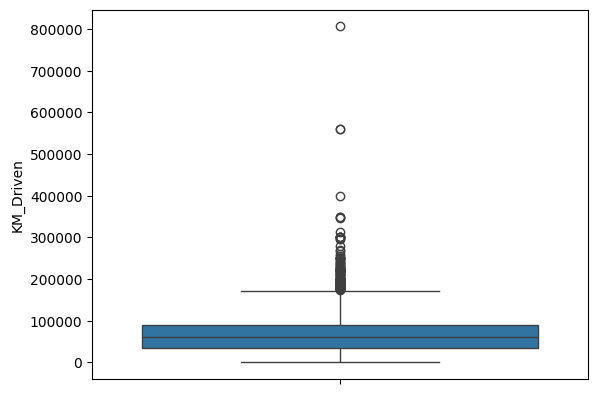

In [365]:
import seaborn as sns
sns.boxplot(df['KM_Driven'])

<Axes: xlabel='KM_Driven', ylabel='Density'>

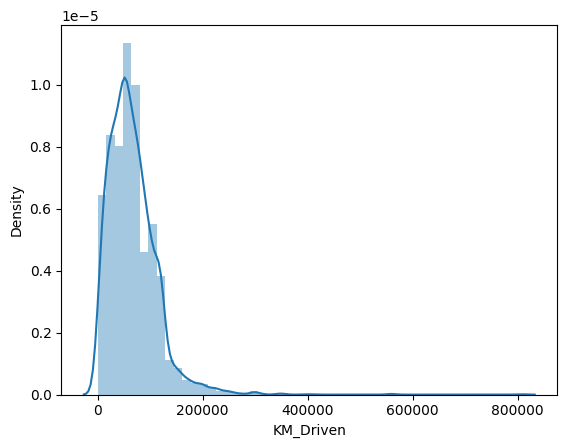

In [366]:
sns.distplot(df['KM_Driven'])

In [367]:
q1 = df['KM_Driven'].quantile(0.25)
q3 = df['KM_Driven'].quantile(0.75)
iqr = q3 - q1

In [368]:
min = q1 - 1.55 * iqr
max = q3 + 1.55 * iqr

In [369]:
df['KM_Driven'] = np.where(df['KM_Driven'] > max, max, np.where(df['KM_Driven'] < min, min, df['KM_Driven']))

<Axes: ylabel='KM_Driven'>

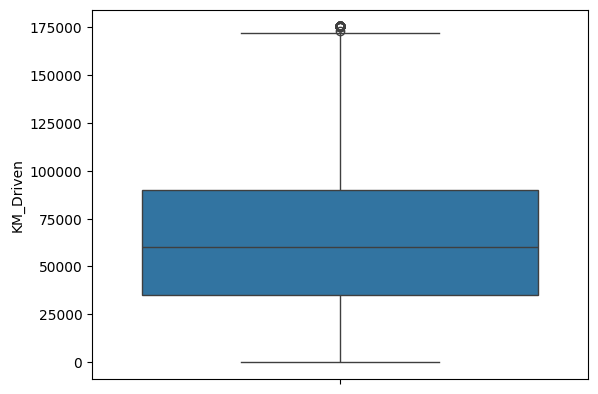

In [370]:
sns.boxplot(df['KM_Driven'])

<Axes: ylabel='Selling_Price'>

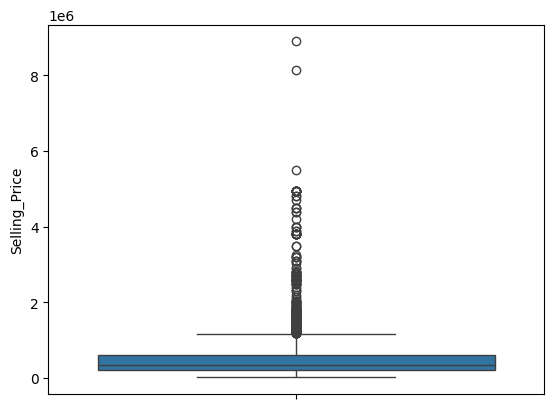

In [371]:
sns.boxplot(df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Density'>

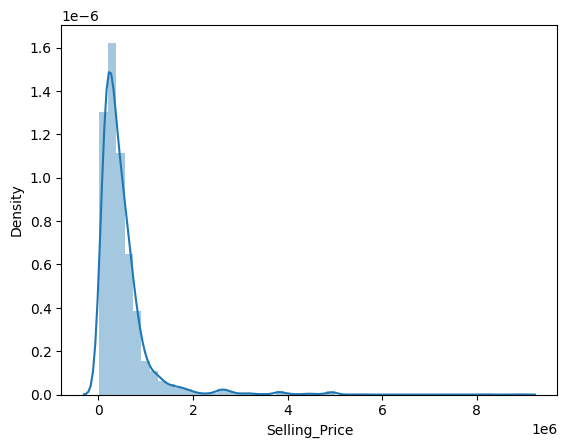

In [372]:
sns.distplot(df['Selling_Price'])

In [373]:
q1 = df['Selling_Price'].quantile(0.25)
q3 = df['Selling_Price'].quantile(0.75)
iqr = q3 - q1

In [374]:
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

In [375]:
df['Selling_Price'] = np.where(df['Selling_Price'] > max, max, np.where(df['Selling_Price'] < min, min, df['Selling_Price']))

<Axes: ylabel='Selling_Price'>

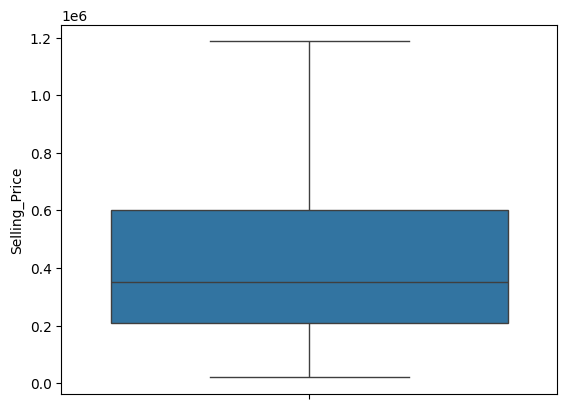

In [376]:
sns.boxplot(df['Selling_Price'])

In [377]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


#**Preprocessing as per requirement**

In [378]:
df = pd.get_dummies(df,columns = ['Fuel','Seller_Type','Transmission','Owner','Brand'],dtype=np.int64)
df

,Model,Year,Selling_Price,KM_Driven,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Dealer,...,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,Maruti 800 AC,2007,60000.0,70000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Datsun RediGO T Option,2017,250000.0,46000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,Maruti 800 AC BSIII,2009,110000.0,83000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [379]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(dtype=np.int64)
df['Model'] = oe.fit_transform(df[['Model']])

In [380]:
df

,Model,Year,Selling_Price,KM_Driven,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Dealer,...,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,775,2007,60000.0,70000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1041,2007,135000.0,50000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,505,2012,600000.0,100000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118,2017,250000.0,46000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,279,2014,450000.0,141000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,602,2014,409999.0,80000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,601,2014,409999.0,80000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,777,2009,110000.0,83000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4338,381,2016,865000.0,90000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Defining target variable(y) and feature variable(x)**

In [381]:
df.columns

Index(['Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel_CNG',
       'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG', 'Fuel_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_First Owner',
       'Owner_Fourth & Above Owner', 'Owner_Second Owner',
       'Owner_Test Drive Car', 'Owner_Third Owner', 'Brand_Ambassador',
       'Brand_Audi', 'Brand_BMW', 'Brand_Chevrolet', 'Brand_Daewoo',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Kia', 'Brand_Land', 'Brand_MG', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_OpelCorsa', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [382]:
y = df['Selling_Price']
x = df.drop('Selling_Price',axis=1)

#**Train-Test Split**

In [383]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.7, random_state=2529 )

#**Model Selection**

In [384]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

#**Training the model**

In [385]:
lin_reg.fit(x_train,y_train)

LinearRegression()

#**Testing the model**

In [386]:
y_pred = lin_reg.predict(x_test)

#**Calculating the metrics**

In [387]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_score(y_test,y_pred)

0.7080714514279245

In [388]:
mean_absolute_error(y_test,y_pred)

122357.77199121602

In [389]:
mean_absolute_error(y_test,y_pred)

122357.77199121602

In [390]:
mean_absolute_percentage_error(y_test,y_pred)

0.4382974094284187